In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = 'SimHei'
# plt.style.use('ggplot')

import seaborn as sns
sns.set_theme(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BostonHousing.csv')  # Read the CSV file into a DataFrame.
df.head()                              # Show the first few rows of the DataFrame.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()  # Display a summary of the DataFrame's structure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()  # Calculate the sum of missing values (NaNs) for each column in the DataFrame.

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

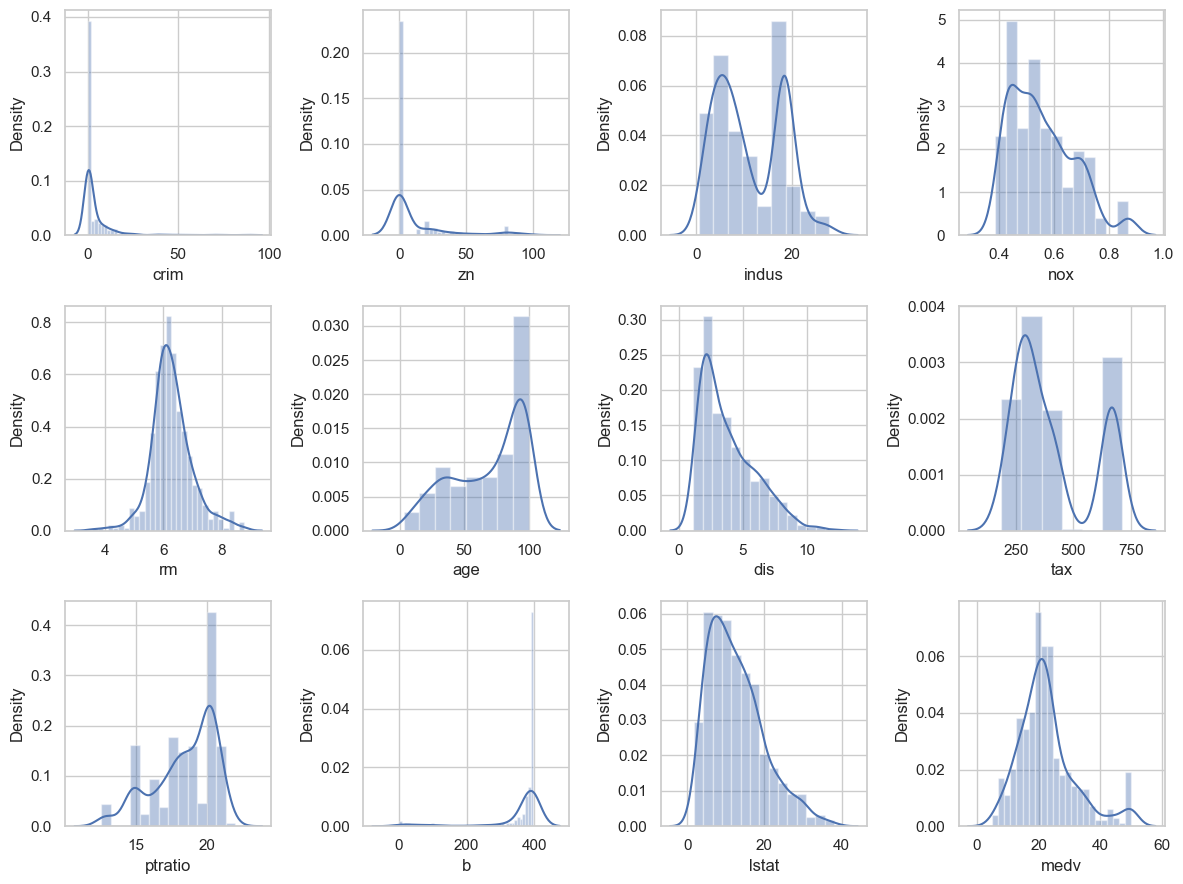

In [5]:
# Create a figure with a 3x4 grid of subplots.
fig, ax = plt.subplots(3, 4)
fig.set_figwidth(12)
fig.set_figheight(9)

# Unpack the axes into separate variables for easier manipulation.
ax1, ax2, ax3 = ax
ax11, ax12, ax13, ax14 = ax1
ax21, ax22, ax23, ax24 = ax2
ax31, ax32, ax33, ax34 = ax3

# Plot distribution plots for selected features in the DataFrame.
sns.distplot(df['crim'], ax=ax11)
sns.distplot(df['zn'], ax=ax12)
sns.distplot(df['indus'], ax=ax13)
sns.distplot(df['nox'], ax=ax14)
sns.distplot(df['rm'], ax=ax21)
sns.distplot(df['age'], ax=ax22)
sns.distplot(df['dis'], ax=ax23)
sns.distplot(df['tax'], ax=ax24)
sns.distplot(df['ptratio'], ax=ax31)
sns.distplot(df['b'], ax=ax32)
sns.distplot(df['lstat'], ax=ax33)
sns.distplot(df['medv'], ax=ax34)

# Adjust the layout to ensure elements do not overlap and display the plots.
plt.tight_layout()
plt.show()

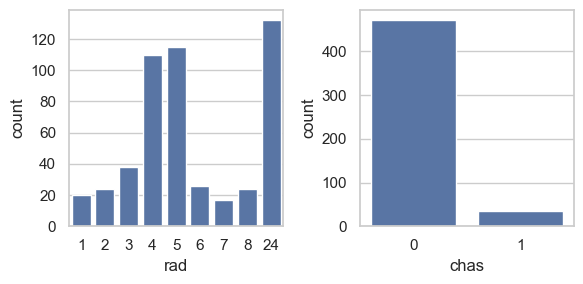

In [6]:
# Create a figure with two subplots side by side.
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(6)
fig.set_figheight(3)
ax1, ax2 = ax

# Plot the count of unique values in 'rad' and 'chas' column using countplot.
sns.barplot(df['rad'].value_counts(), ax=ax1)
sns.barplot(df['chas'].value_counts(), ax=ax2)

# Adjust the layout to ensure elements do not overlap and display the plots.
plt.tight_layout()
plt.show()

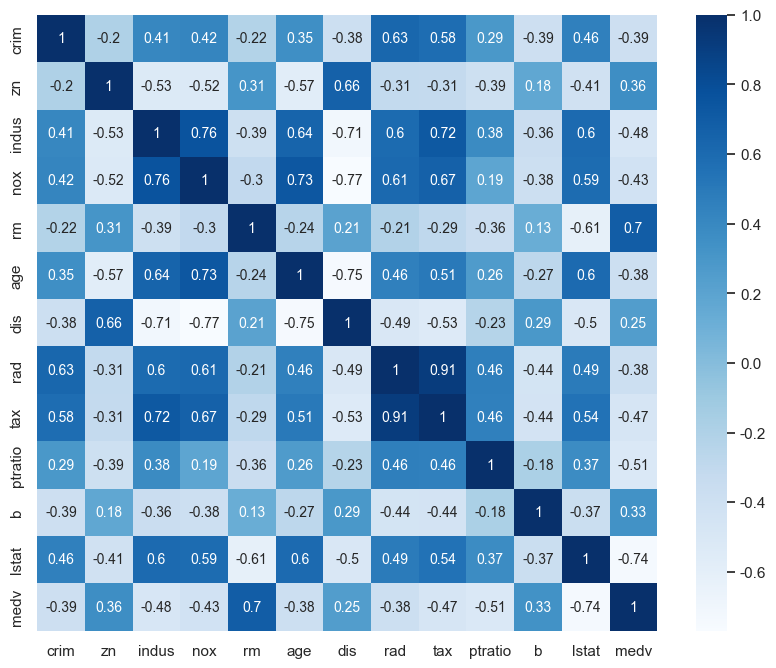

In [7]:
# Calculate the correlation matrix and plot it as a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('chas', axis=1).corr(), annot=True, annot_kws={'size': 10}, cmap='Blues')
plt.show()

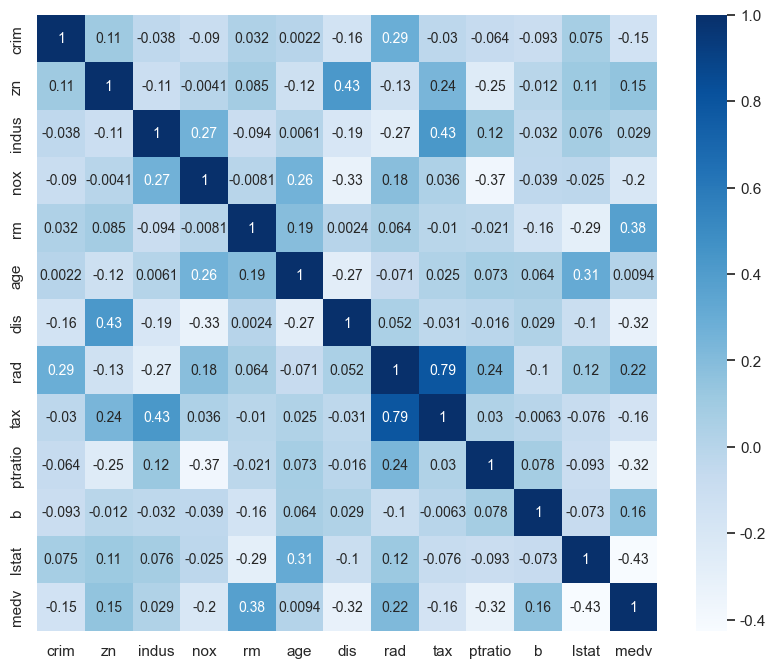

In [8]:
import pingouin as pg

# Initialize an empty DataFrame to store the partial correlation matrix excluding column 'chas'.
columns = list(df.drop('chas', axis=1).columns)
matrix = pd.DataFrame(data=0, index=columns, columns=columns)

# Iterate over all pairs of columns to calculate partial correlations.
for i in columns:
    for j in columns:
        if i != j:
            # Calculate partial correlation between columns i and j, controlling for all other columns.
            result = pg.partial_corr(data=df, x=i, y=j, covar=[c for c in columns if c != i and c != j])
            matrix.loc[i, j] = result['r']['pearson']
        else:
            # Set the diagonal elements to 1, representing perfect correlation with themselves.
            matrix.loc[i, j] = 1

# Plot the partial correlation matrix as a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, cmap='Blues')
plt.show()

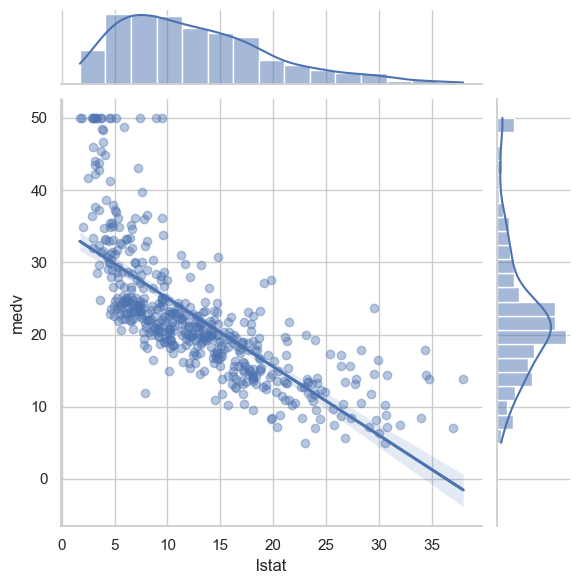

In [9]:
# Create a joint plot for the 'lstat' and 'medv' columns that combines a scatter plot with histogram plots.
sns.jointplot(x='lstat', y='medv', data=df, kind='reg', scatter_kws={'alpha': 0.4});

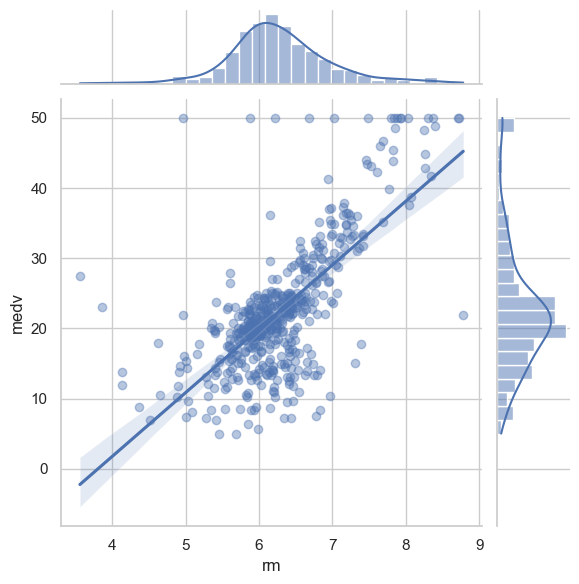

In [10]:
# Create a joint plot for the 'rm' and 'medv' columns that combines a scatter plot with histogram plots.
sns.jointplot(x='rm', y='medv', data=df, kind='reg', scatter_kws={'alpha': 0.4});

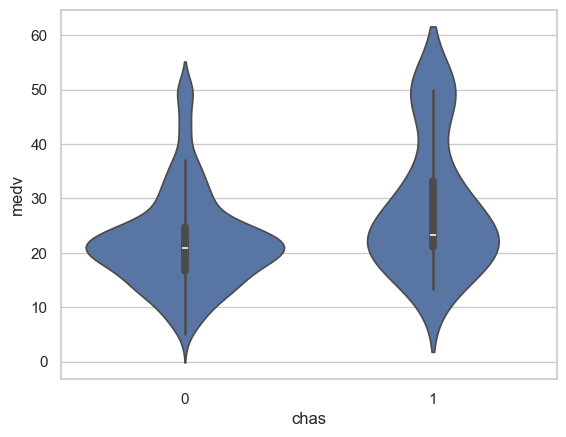

In [11]:
# Create a violin plot to visualize the distribution of 'medv' with respect to 'chas'.
sns.violinplot(x='chas', y='medv', data=df);